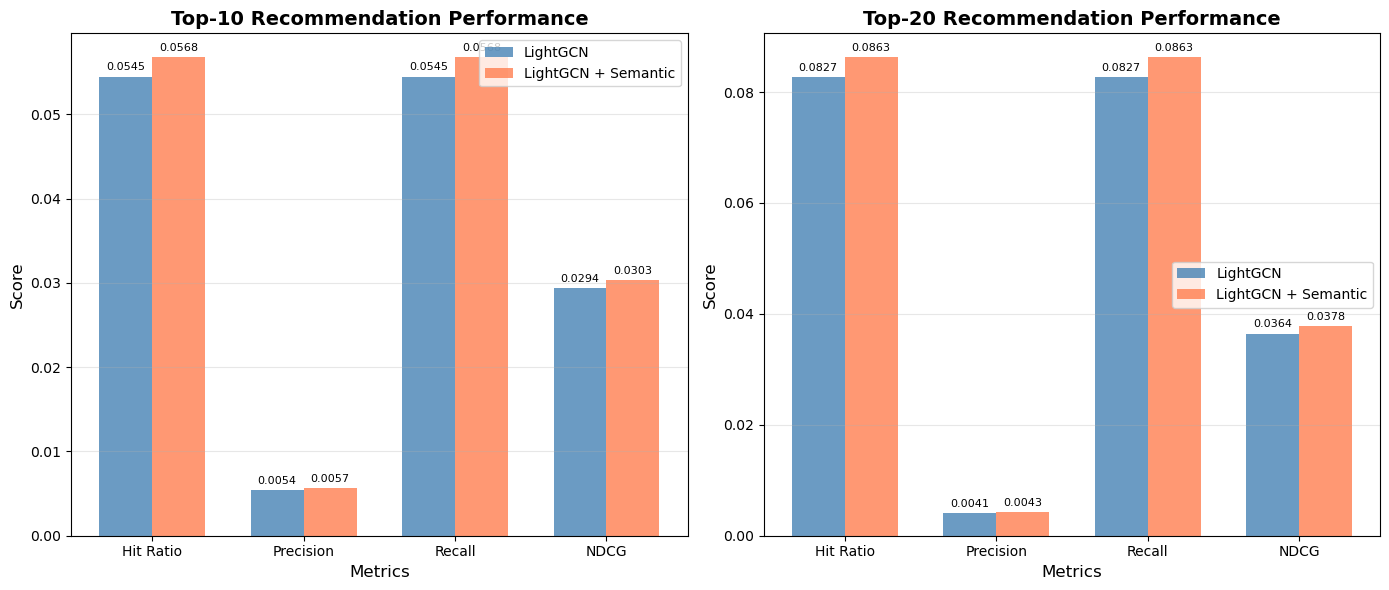


Improvement of LightGCN_Semantic over LightGCN

Top-10:
  Hit Ratio: +4.20%
  Precision: +4.22%
  Recall: +4.20%
  NDCG: +3.34%

Top-20:
  Hit Ratio: +4.39%
  Precision: +4.36%
  Recall: +4.39%
  NDCG: +3.65%


: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Performance data
metrics = ['Hit Ratio', 'Precision', 'Recall', 'NDCG']

# LightGCN (baseline)
lightgcn_top10 = [0.0545, 0.00545, 0.0545, 0.02937]
lightgcn_top20 = [0.08265, 0.00413, 0.08265, 0.03644]

# LightGCN_Semantic
semantic_top10 = [0.05679, 0.00568, 0.05679, 0.03035]
semantic_top20 = [0.08628, 0.00431, 0.08628, 0.03777]

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

x = np.arange(len(metrics))
width = 0.35

# Top 10 comparison
ax1 = axes[0]
bars1 = ax1.bar(x - width/2, lightgcn_top10, width, label='LightGCN', color='steelblue', alpha=0.8)
bars2 = ax1.bar(x + width/2, semantic_top10, width, label='LightGCN + Semantic', color='coral', alpha=0.8)
ax1.set_xlabel('Metrics', fontsize=12)
ax1.set_ylabel('Score', fontsize=12)
ax1.set_title('Top-10 Recommendation Performance', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    ax1.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

# Top 20 comparison
ax2 = axes[1]
bars3 = ax2.bar(x - width/2, lightgcn_top20, width, label='LightGCN', color='steelblue', alpha=0.8)
bars4 = ax2.bar(x + width/2, semantic_top20, width, label='LightGCN + Semantic', color='coral', alpha=0.8)
ax2.set_xlabel('Metrics', fontsize=12)
ax2.set_ylabel('Score', fontsize=12)
ax2.set_title('Top-20 Recommendation Performance', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars3:
    height = bar.get_height()
    ax2.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
for bar in bars4:
    height = bar.get_height()
    ax2.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('results/performance_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# Print improvement percentages
print("\n" + "="*50)
print("Improvement of LightGCN_Semantic over LightGCN")
print("="*50)
print("\nTop-10:")
for i, metric in enumerate(metrics):
    improvement = ((semantic_top10[i] - lightgcn_top10[i]) / lightgcn_top10[i]) * 100
    print(f"  {metric}: {improvement:+.2f}%")

print("\nTop-20:")
for i, metric in enumerate(metrics):
    improvement = ((semantic_top20[i] - lightgcn_top20[i]) / lightgcn_top20[i]) * 100
    print(f"  {metric}: {improvement:+.2f}%")



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Performance data
metrics = ['Hit Ratio', 'Precision', 'Recall', 'NDCG']

# LightGCN (baseline) 3 layers
lightgcn_3_top10 = [0.0545, 0.00545, 0.0545, 0.02937]
lightgcn_3_top20 = [0.08265, 0.00413, 0.08265, 0.03644]

# LightGCN (baseline) 2 layers
lightgcn_2_top10 = [0.05448, 0.00545, 0.05448, 0.02911]
lightgcn_2_top20 = [0.08285, 0.00414, 0.08285, 0.03623]

# LightGCN_Semantic 3 layers
semantic_3_top10 = [0.05814, 0.00581, 0.05814, 0.03087]
semantic_3_top20 = [0.08842, 0.00442, 0.08842, 0.03847]

# LightGCN_Semantic 2 layers
semantic_2_top10 = [0.05679, 0.00568, 0.05679, 0.03035]
semantic_2_top20 = [0.08628, 0.00431, 0.08628, 0.03777]

variants = [
    ("LightGCN 3L", "#4c72b0", lightgcn_3_top10, lightgcn_3_top20),
    ("LightGCN 2L", "#6c8dc3", lightgcn_2_top10, lightgcn_2_top20),
    ("LightGCN+Semantic 3L", "#dd8452", semantic_3_top10, semantic_3_top20),
    ("LightGCN+Semantic 2L", "#e39c6c", semantic_2_top10, semantic_2_top20),
]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
x = np.arange(len(metrics))
width = 0.18

max_top10 = max(max(v[2]) for v in variants)
max_top20 = max(max(v[3]) for v in variants)

def draw_group(ax, selector, title, y_max):
    for i, (label, color, top10, top20) in enumerate(variants):
        scores = top10 if selector == "top10" else top20
        offsets = (-1.5 + i) * width
        bars = ax.bar(x + offsets, scores, width, label=label, color=color, alpha=0.9)
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f"{height:.4f}", xy=(bar.get_x() + bar.get_width()/2, height),
                        xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.set_ylim(0, y_max * 1.25)
    ax.set_ylabel('Score')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

draw_group(axes[0], "top10", "Top-10 Performance by Depth", max_top10)
draw_group(axes[1], "top20", "Top-20 Performance by Depth", max_top20)

axes[0].legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))
plt.tight_layout()
plt.savefig('results/performance_comparison_layers.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*50)
print("Semantic gain vs baseline (percent)")
print("="*50)
for layer, base10, base20, sem10, sem20 in [
    ("3 layers", lightgcn_3_top10, lightgcn_3_top20, semantic_3_top10, semantic_3_top20),
    ("2 layers", lightgcn_2_top10, lightgcn_2_top20, semantic_2_top10, semantic_2_top20),
]:
    print(f"\n{layer} Top-10:")
    for metric, b, s in zip(metrics, base10, sem10):
        pct = (s - b) / b * 100
        print(f"  {metric}: {pct:+.2f}%")
    print(f"{layer} Top-20:")
    for metric, b, s in zip(metrics, base20, sem20):
        pct = (s - b) / b * 100
        print(f"  {metric}: {pct:+.2f}%")


: 